In [1]:
import numpy as np
from matplotlib.pyplot import plot, scatter, legend, show

In [2]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [3]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                
                print('epoch: ',epoch+1, ', Loss: {0:.4f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [4]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

In [7]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)

noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * (X))  + noise

rbfnet = RBFNet(lr=1e-2, k=2, epochs = 10, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)


epoch:  1 , Loss: 2.0137
epoch:  1 , Loss: 1.9833
epoch:  1 , Loss: 1.6493
epoch:  1 , Loss: 1.6200
epoch:  1 , Loss: 1.0922
epoch:  1 , Loss: 1.2727
epoch:  1 , Loss: 1.1712
epoch:  1 , Loss: 0.9067
epoch:  1 , Loss: 0.9055
epoch:  1 , Loss: 0.8649
epoch:  1 , Loss: 1.0324
epoch:  1 , Loss: 0.9108
epoch:  1 , Loss: 0.7568
epoch:  1 , Loss: 0.6917
epoch:  1 , Loss: 0.6846
epoch:  1 , Loss: 0.3573
epoch:  1 , Loss: 0.3668
epoch:  1 , Loss: 0.3480
epoch:  1 , Loss: 0.1825
epoch:  1 , Loss: 0.1853
epoch:  1 , Loss: 0.1732
epoch:  1 , Loss: 0.2592
epoch:  1 , Loss: 0.1963
epoch:  1 , Loss: 0.2455
epoch:  1 , Loss: 0.1015
epoch:  1 , Loss: 0.1024
epoch:  1 , Loss: 0.0622
epoch:  1 , Loss: 0.1764
epoch:  1 , Loss: 0.1656
epoch:  1 , Loss: 0.0825
epoch:  1 , Loss: 0.1169
epoch:  1 , Loss: 0.1148
epoch:  1 , Loss: 0.1195
epoch:  1 , Loss: 0.2135
epoch:  1 , Loss: 0.1643
epoch:  1 , Loss: 0.1525
epoch:  1 , Loss: 0.1361
epoch:  1 , Loss: 0.2135
epoch:  1 , Loss: 0.3282
epoch:  1 , Loss: 0.2214


epoch:  6 , Loss: 0.0466
epoch:  6 , Loss: 0.0349
epoch:  6 , Loss: 0.0348
epoch:  6 , Loss: 0.1115
epoch:  6 , Loss: 0.0991
epoch:  6 , Loss: 0.0981
epoch:  6 , Loss: 0.0422
epoch:  6 , Loss: 0.0657
epoch:  6 , Loss: 0.0356
epoch:  6 , Loss: 0.1239
epoch:  6 , Loss: 0.1199
epoch:  6 , Loss: 0.1675
epoch:  6 , Loss: 0.0529
epoch:  6 , Loss: 0.0537
epoch:  6 , Loss: 0.1161
epoch:  6 , Loss: 0.0940
epoch:  6 , Loss: 0.1134
epoch:  6 , Loss: 0.1080
epoch:  6 , Loss: 0.0496
epoch:  6 , Loss: 0.0892
epoch:  6 , Loss: 0.0986
epoch:  6 , Loss: 0.1110
epoch:  6 , Loss: 0.0748
epoch:  6 , Loss: 0.0373
epoch:  6 , Loss: 0.1143
epoch:  6 , Loss: 0.0921
epoch:  6 , Loss: 0.0379
epoch:  6 , Loss: 0.0401
epoch:  6 , Loss: 0.0115
epoch:  6 , Loss: 0.0670
epoch:  6 , Loss: 0.0573
epoch:  6 , Loss: 0.0428
epoch:  6 , Loss: 0.0235
epoch:  6 , Loss: 0.0191
epoch:  6 , Loss: 0.0296
epoch:  6 , Loss: 0.0220
epoch:  6 , Loss: 0.0058
epoch:  6 , Loss: 0.0118
epoch:  6 , Loss: 0.0089
epoch:  6 , Loss: 0.0005


epoch:  13 , Loss: 0.0389
epoch:  13 , Loss: 0.0355
epoch:  13 , Loss: 0.0536
epoch:  13 , Loss: 0.0431
epoch:  13 , Loss: 0.0193
epoch:  13 , Loss: 0.0355
epoch:  13 , Loss: 0.0402
epoch:  13 , Loss: 0.0085
epoch:  13 , Loss: 0.0057
epoch:  13 , Loss: 0.0039
epoch:  13 , Loss: 0.0315
epoch:  13 , Loss: 0.0002
epoch:  13 , Loss: 0.0100
epoch:  13 , Loss: 0.0013
epoch:  13 , Loss: 0.0002
epoch:  13 , Loss: 0.0081
epoch:  13 , Loss: 0.0136
epoch:  13 , Loss: 0.0014
epoch:  13 , Loss: 0.0002
epoch:  13 , Loss: 0.0003
epoch:  13 , Loss: 0.0151
epoch:  13 , Loss: 0.0128
epoch:  13 , Loss: 0.0087
epoch:  13 , Loss: 0.0007
epoch:  13 , Loss: 0.0013
epoch:  13 , Loss: 0.0008
epoch:  13 , Loss: 0.0002
epoch:  13 , Loss: 0.0143
epoch:  13 , Loss: 0.0069
epoch:  13 , Loss: 0.0000
epoch:  13 , Loss: 0.0028
epoch:  13 , Loss: 0.0183
epoch:  13 , Loss: 0.0024
epoch:  13 , Loss: 0.0319
epoch:  13 , Loss: 0.0088
epoch:  13 , Loss: 0.0313
epoch:  13 , Loss: 0.1126
epoch:  13 , Loss: 0.0641
epoch:  13 ,

epoch:  21 , Loss: 0.0611
epoch:  21 , Loss: 0.0456
epoch:  21 , Loss: 0.0242
epoch:  21 , Loss: 0.1067
epoch:  21 , Loss: 0.0935
epoch:  21 , Loss: 0.0409
epoch:  21 , Loss: 0.0475
epoch:  21 , Loss: 0.0159
epoch:  21 , Loss: 0.0820
epoch:  21 , Loss: 0.0790
epoch:  21 , Loss: 0.0691
epoch:  21 , Loss: 0.0444
epoch:  21 , Loss: 0.0412
epoch:  21 , Loss: 0.0615
epoch:  21 , Loss: 0.0502
epoch:  21 , Loss: 0.0242
epoch:  21 , Loss: 0.0433
epoch:  21 , Loss: 0.0502
epoch:  21 , Loss: 0.0136
epoch:  21 , Loss: 0.0099
epoch:  21 , Loss: 0.0075
epoch:  21 , Loss: 0.0405
epoch:  21 , Loss: 0.0015
epoch:  21 , Loss: 0.0154
epoch:  21 , Loss: 0.0036
epoch:  21 , Loss: 0.0001
epoch:  21 , Loss: 0.0131
epoch:  21 , Loss: 0.0199
epoch:  21 , Loss: 0.0039
epoch:  21 , Loss: 0.0001
epoch:  21 , Loss: 0.0000
epoch:  21 , Loss: 0.0216
epoch:  21 , Loss: 0.0187
epoch:  21 , Loss: 0.0136
epoch:  21 , Loss: 0.0025
epoch:  21 , Loss: 0.0035
epoch:  21 , Loss: 0.0000
epoch:  21 , Loss: 0.0001
epoch:  21 ,

epoch:  29 , Loss: 0.0036
epoch:  29 , Loss: 0.0000
epoch:  29 , Loss: 0.0054
epoch:  29 , Loss: 0.0088
epoch:  29 , Loss: 0.0098
epoch:  29 , Loss: 0.0295
epoch:  29 , Loss: 0.0000
epoch:  29 , Loss: 0.0001
epoch:  29 , Loss: 0.0150
epoch:  29 , Loss: 0.0145
epoch:  29 , Loss: 0.0341
epoch:  29 , Loss: 0.0347
epoch:  29 , Loss: 0.0096
epoch:  29 , Loss: 0.0387
epoch:  29 , Loss: 0.0487
epoch:  29 , Loss: 0.0604
epoch:  29 , Loss: 0.0459
epoch:  29 , Loss: 0.0249
epoch:  29 , Loss: 0.1092
epoch:  29 , Loss: 0.0962
epoch:  29 , Loss: 0.0428
epoch:  29 , Loss: 0.0497
epoch:  29 , Loss: 0.0172
epoch:  29 , Loss: 0.0851
epoch:  29 , Loss: 0.0823
epoch:  29 , Loss: 0.0723
epoch:  29 , Loss: 0.0470
epoch:  29 , Loss: 0.0437
epoch:  29 , Loss: 0.0645
epoch:  29 , Loss: 0.0529
epoch:  29 , Loss: 0.0261
epoch:  29 , Loss: 0.0457
epoch:  29 , Loss: 0.0522
epoch:  29 , Loss: 0.0145
epoch:  29 , Loss: 0.0107
epoch:  29 , Loss: 0.0081
epoch:  29 , Loss: 0.0419
epoch:  29 , Loss: 0.0018
epoch:  29 ,

epoch:  36 , Loss: 0.0020
epoch:  36 , Loss: 0.0028
epoch:  36 , Loss: 0.0001
epoch:  36 , Loss: 0.0000
epoch:  36 , Loss: 0.0109
epoch:  36 , Loss: 0.0046
epoch:  36 , Loss: 0.0002
epoch:  36 , Loss: 0.0015
epoch:  36 , Loss: 0.0146
epoch:  36 , Loss: 0.0012
epoch:  36 , Loss: 0.0266
epoch:  36 , Loss: 0.0059
epoch:  36 , Loss: 0.0257
epoch:  36 , Loss: 0.0992
epoch:  36 , Loss: 0.0538
epoch:  36 , Loss: 0.0497
epoch:  36 , Loss: 0.0338
epoch:  36 , Loss: 0.1070
epoch:  36 , Loss: 0.0654
epoch:  36 , Loss: 0.0324
epoch:  36 , Loss: 0.0339
epoch:  36 , Loss: 0.0363
epoch:  36 , Loss: 0.0755
epoch:  36 , Loss: 0.0297
epoch:  36 , Loss: 0.0004
epoch:  36 , Loss: 0.0005
epoch:  36 , Loss: 0.0008
epoch:  36 , Loss: 0.0000
epoch:  36 , Loss: 0.0015
epoch:  36 , Loss: 0.0034
epoch:  37 , Loss: 0.2063
epoch:  37 , Loss: 0.2183
epoch:  37 , Loss: 0.1418
epoch:  37 , Loss: 0.1534
epoch:  37 , Loss: 0.0372
epoch:  37 , Loss: 0.0846
epoch:  37 , Loss: 0.0688
epoch:  37 , Loss: 0.0223
epoch:  37 ,

epoch:  43 , Loss: 0.0024
epoch:  43 , Loss: 0.0003
epoch:  43 , Loss: 0.0000
epoch:  43 , Loss: 0.0118
epoch:  43 , Loss: 0.0053
epoch:  43 , Loss: 0.0001
epoch:  43 , Loss: 0.0018
epoch:  43 , Loss: 0.0156
epoch:  43 , Loss: 0.0015
epoch:  43 , Loss: 0.0276
epoch:  43 , Loss: 0.0063
epoch:  43 , Loss: 0.0265
epoch:  43 , Loss: 0.0995
epoch:  43 , Loss: 0.0537
epoch:  43 , Loss: 0.0488
epoch:  43 , Loss: 0.0331
epoch:  43 , Loss: 0.1056
epoch:  43 , Loss: 0.0638
epoch:  43 , Loss: 0.0310
epoch:  43 , Loss: 0.0322
epoch:  43 , Loss: 0.0343
epoch:  43 , Loss: 0.0725
epoch:  43 , Loss: 0.0274
epoch:  43 , Loss: 0.0001
epoch:  43 , Loss: 0.0010
epoch:  43 , Loss: 0.0014
epoch:  43 , Loss: 0.0002
epoch:  43 , Loss: 0.0009
epoch:  43 , Loss: 0.0046
epoch:  44 , Loss: 0.2002
epoch:  44 , Loss: 0.2125
epoch:  44 , Loss: 0.1378
epoch:  44 , Loss: 0.1498
epoch:  44 , Loss: 0.0358
epoch:  44 , Loss: 0.0825
epoch:  44 , Loss: 0.0670
epoch:  44 , Loss: 0.0214
epoch:  44 , Loss: 0.0257
epoch:  44 ,

epoch:  49 , Loss: 0.0285
epoch:  49 , Loss: 0.0066
epoch:  49 , Loss: 0.0270
epoch:  49 , Loss: 0.0997
epoch:  49 , Loss: 0.0537
epoch:  49 , Loss: 0.0482
epoch:  49 , Loss: 0.0325
epoch:  49 , Loss: 0.1047
epoch:  49 , Loss: 0.0627
epoch:  49 , Loss: 0.0299
epoch:  49 , Loss: 0.0309
epoch:  49 , Loss: 0.0329
epoch:  49 , Loss: 0.0703
epoch:  49 , Loss: 0.0257
epoch:  49 , Loss: 0.0000
epoch:  49 , Loss: 0.0014
epoch:  49 , Loss: 0.0020
epoch:  49 , Loss: 0.0005
epoch:  49 , Loss: 0.0005
epoch:  49 , Loss: 0.0056
epoch:  50 , Loss: 0.1955
epoch:  50 , Loss: 0.2081
epoch:  50 , Loss: 0.1348
epoch:  50 , Loss: 0.1471
epoch:  50 , Loss: 0.0347
epoch:  50 , Loss: 0.0809
epoch:  50 , Loss: 0.0657
epoch:  50 , Loss: 0.0207
epoch:  50 , Loss: 0.0250
epoch:  50 , Loss: 0.0277
epoch:  50 , Loss: 0.0743
epoch:  50 , Loss: 0.0518
epoch:  50 , Loss: 0.0281
epoch:  50 , Loss: 0.0198
epoch:  50 , Loss: 0.0375
epoch:  50 , Loss: 0.0039
epoch:  50 , Loss: 0.0114
epoch:  50 , Loss: 0.0110
epoch:  50 ,

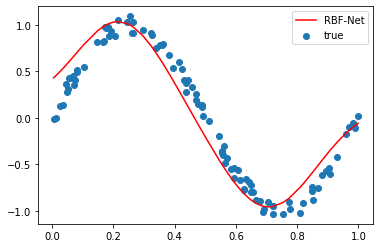

In [8]:
scatter(X, y, label='true')
plot(X, y_pred, '-r', label='RBF-Net')
legend()
show()